<a href="https://colab.research.google.com/github/LakshmikanthGopi/Guvi-Assignment/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

# **Descriptive Analysis**

In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/LakshmikanthGopi/Datasets/main/car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [31]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [32]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


# **EDA**

In [33]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



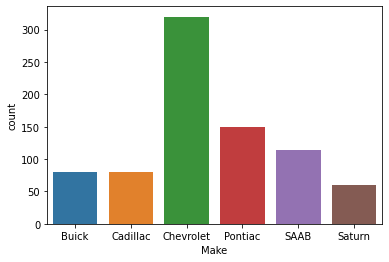

In [34]:
import seaborn as sns
sns.countplot(df["Make"])
plt.show()

In [35]:
import plotly.express as px
fig=px.bar(df,x='Model')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



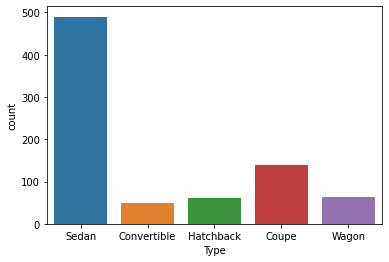

In [36]:
sns.countplot(df["Type"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



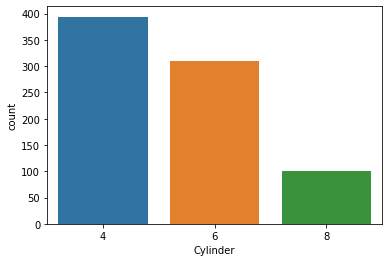

In [37]:
sns.countplot(df["Cylinder"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



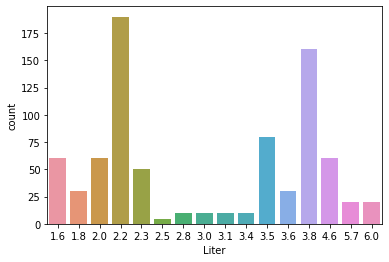

In [38]:
sns.countplot(df["Liter"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



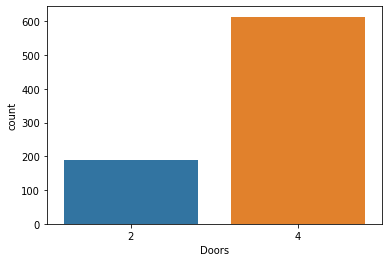

In [39]:
sns.countplot(df["Doors"])
plt.show()

In [40]:
fig=px.bar(df,x='Trim')
fig.show()

# **Tasks, Part 1**

In [41]:
x=df[['Mileage']].values

y=df['Price'].values


In [42]:
#this is the import statment for splitting
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [44]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 24811.158249368393
slope(m) is [-0.15980211]


In [45]:
y_pred = model.predict(x_test)
y_pred

array([20885.13990382, 21753.18498901, 21082.17591082, 24067.75881337,
       19562.61760539, 19480.63912072, 24428.91159182, 20571.28855122,
       24199.43575561, 16759.20911321, 18571.0454858 , 23581.48097938,
       24417.40583959, 21371.41773781, 23124.44693232, 21683.99067349,
       21383.08329216, 20677.23735304, 22473.73272265, 22710.55945613,
       22236.58638494, 20869.79890084, 19825.01267717, 21638.4470709 ,
       22397.5071141 , 21200.26967333, 21084.09353619, 21661.13897114,
       22243.45787586, 23051.25756394, 22853.42254637, 21368.22169552,
       21623.9050785 , 20413.24426012, 20696.8930131 , 23991.2136006 ,
       20426.50783561, 21179.01599212, 22050.89632806, 21680.31522486,
       21829.09099333, 20227.55420323, 21199.9500691 , 21685.10928829,
       23951.58267624, 20999.5582177 , 20633.4515737 , 20699.92925328,
       21467.29900642, 22001.35767261, 21195.4756099 , 21287.20202354,
       19691.25830745, 20499.69720399, 21691.66117498, 23530.02469856,
      

In [46]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_pred


,Actual,Predicted
0,11045.108844,20885.139904
1,12045.920705,21753.184989
2,14703.136868,21082.175911
3,15053.933735,24067.758813
4,12553.071428,19562.617605
...,...,...
237,19981.127911,20924.291422
238,16391.926573,21919.379188
239,16825.190882,21062.200647
240,22358.877678,23377.733284


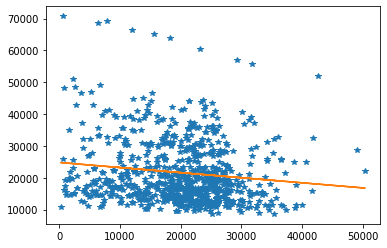

In [47]:
plt.plot(x,y,'*')
plt.plot(x,model.predict(x))

In [48]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)


0.018115403106448658


The model R2 score is less than 0.8 and there is no correlation between values

# **Part 2**

Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [ ]:
x=df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]]
y=df["Price"]

In [119]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [120]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [121]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 35.53433071063773
slope(m) is [4743.07486159  289.94615449  818.05777982 -285.65038264 -910.75866896]


In [122]:
y_pred = model.predict(x_test)
y_pred

array([17858.09393282, 17800.21876392, 26167.15859123, 17800.21876392,
       16943.26761601, 23072.26117003, 15290.72055646, 22467.78407945,
       22288.65644007, 19842.03081583, 23179.87621212, 15407.40066074,
       15978.70142601, 15978.70142601, 33400.56195018, 19842.03081583,
       22467.78407945, 16947.33526386, 16947.33526386, 12905.26889101,
       23072.26117003, 15290.72055646, 23072.26117003, 19072.06351427,
       29401.45659327, 20521.20523159,  9771.36403971, 17800.21876392,
       19842.03081583, 25106.41144472, 22574.3068227 , 18161.30484532,
       16947.33526386, 16943.26761601, 17858.09393282, 26167.15859123,
        9771.36403971, 23179.87621212, 37321.8805709 , 20293.54407985,
       33400.56195018, 15121.7502781 , 19556.3804332 , 20293.54407985,
       23072.26117003, 20293.54407985, 16943.26761601, 15978.70142601,
       22574.3068227 , 27603.77392411, 23179.87621212, 19357.71389691,
       37642.47073579, 23072.26117003, 37321.8805709 , 19072.06351427,
      

In [123]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_pred.head()

,Actual,Predicted
0,11045.108844,17858.093933
1,12045.920705,17800.218764
2,14703.136868,26167.158591
3,15053.933735,17800.218764
4,12553.071428,16943.267616


In [124]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)


0.40420557686340064


The model R2 score is less than 0.8 and there is no correlation between values

The combination of the factors that is the best predictor for price.

In [50]:
x=df[['Cylinder']].values

y=df['Price'].values


In [51]:
#this is the import statment for splitting
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [53]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 343.4014696924387
slope(m) is [3994.28782737]


In [54]:
y_pred = model.predict(x_test)
y_pred

array([16320.55277919, 16320.55277919, 24309.12843394, 16320.55277919,
       16320.55277919, 24309.12843394, 16320.55277919, 24309.12843394,
       16320.55277919, 16320.55277919, 24309.12843394, 16320.55277919,
       16320.55277919, 16320.55277919, 32297.70408868, 16320.55277919,
       24309.12843394, 16320.55277919, 16320.55277919, 16320.55277919,
       24309.12843394, 16320.55277919, 24309.12843394, 16320.55277919,
       32297.70408868, 24309.12843394, 16320.55277919, 16320.55277919,
       16320.55277919, 24309.12843394, 16320.55277919, 16320.55277919,
       16320.55277919, 16320.55277919, 16320.55277919, 24309.12843394,
       16320.55277919, 24309.12843394, 32297.70408868, 24309.12843394,
       32297.70408868, 16320.55277919, 16320.55277919, 24309.12843394,
       24309.12843394, 24309.12843394, 16320.55277919, 16320.55277919,
       16320.55277919, 24309.12843394, 24309.12843394, 16320.55277919,
       32297.70408868, 24309.12843394, 32297.70408868, 16320.55277919,
      

In [55]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_pred.head()


,Actual,Predicted
0,11045.108844,16320.552779
1,12045.920705,16320.552779
2,14703.136868,24309.128434
3,15053.933735,16320.552779
4,12553.071428,16320.552779


In [56]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)


0.3169773147003052


The model R2 score is less than 0.8 and there is no correlation between values


In [57]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [58]:
# Import LabelEncoder
from sklearn import preprocessing
import pandas as pd
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
 
df["Make"]=le.fit_transform(df["Make"])
df["Model"]=le.fit_transform(df["Model"])
df["Trim"]=le.fit_transform(df["Trim"])
df["Type"]=le.fit_transform(df["Type"])


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    int64  
 3   Model     804 non-null    int64  
 4   Trim      804 non-null    int64  
 5   Type      804 non-null    int64  
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 75.5 KB


In [60]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,44,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,44,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,44,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,44,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,44,3,6,3.1,4,1,0,1


In [61]:
x=df[['Liter']].values

y=df['Price'].values


In [62]:
#this is the import statment for splitting
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [64]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 6485.023429142291
slope(m) is [4904.23198461]


In [65]:
y_pred = model.predict(x_test)
y_pred

array([14331.79460452, 17274.33379529, 23159.41217683, 17274.33379529,
       17274.33379529, 25121.10497067, 17274.33379529, 23649.83537529,
       16293.48739837, 16293.48739837, 25121.10497067, 17274.33379529,
       17274.33379529, 17274.33379529, 29044.49055836, 16293.48739837,
       23649.83537529, 14331.79460452, 14331.79460452, 17274.33379529,
       25121.10497067, 17274.33379529, 25121.10497067, 17764.75699375,
       29044.49055836, 24140.25857375, 15312.64100144, 17274.33379529,
       16293.48739837, 20216.87298606, 16293.48739837, 17764.75699375,
       14331.79460452, 17274.33379529, 14331.79460452, 23159.41217683,
       15312.64100144, 25121.10497067, 29044.49055836, 25121.10497067,
       29044.49055836, 17274.33379529, 16293.48739837, 25121.10497067,
       25121.10497067, 25121.10497067, 17274.33379529, 17274.33379529,
       16293.48739837, 25121.10497067, 25121.10497067, 17764.75699375,
       35910.41533682, 25121.10497067, 29044.49055836, 17764.75699375,
      

In [66]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_pred


,Actual,Predicted
0,11045.108844,14331.794605
1,12045.920705,17274.333795
2,14703.136868,23159.412177
3,15053.933735,17274.333795
4,12553.071428,17274.333795
...,...,...
237,19981.127911,25121.104971
238,16391.926573,15312.641001
239,16825.190882,23649.835375
240,22358.877678,24140.258574


In [67]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)


0.30274368792317796


The model R2 score is less than 0.8 and there is no correlation between values

In [68]:
x=df[['Doors']].values

y=df['Price'].values


In [69]:
#this is the import statment for splitting
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [71]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 27838.038383641608
slope(m) is [-1769.14180958]


In [72]:
y_pred = model.predict(x_test)
y_pred

array([20761.47114532, 24299.75476448, 24299.75476448, 24299.75476448,
       24299.75476448, 20761.47114532, 20761.47114532, 20761.47114532,
       24299.75476448, 20761.47114532, 24299.75476448, 20761.47114532,
       20761.47114532, 20761.47114532, 20761.47114532, 20761.47114532,
       20761.47114532, 20761.47114532, 20761.47114532, 24299.75476448,
       20761.47114532, 20761.47114532, 20761.47114532, 20761.47114532,
       20761.47114532, 20761.47114532, 20761.47114532, 24299.75476448,
       20761.47114532, 20761.47114532, 24299.75476448, 20761.47114532,
       20761.47114532, 24299.75476448, 20761.47114532, 24299.75476448,
       20761.47114532, 24299.75476448, 20761.47114532, 20761.47114532,
       20761.47114532, 20761.47114532, 20761.47114532, 20761.47114532,
       20761.47114532, 20761.47114532, 24299.75476448, 20761.47114532,
       24299.75476448, 20761.47114532, 24299.75476448, 20761.47114532,
       24299.75476448, 20761.47114532, 20761.47114532, 20761.47114532,
      

In [73]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_pred


,Actual,Predicted
0,11045.108844,20761.471145
1,12045.920705,24299.754764
2,14703.136868,24299.754764
3,15053.933735,24299.754764
4,12553.071428,24299.754764
...,...,...
237,19981.127911,20761.471145
238,16391.926573,20761.471145
239,16825.190882,20761.471145
240,22358.877678,20761.471145


In [74]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)


0.022979983464402554


The model R2 score is less than 0.8 and there is no correlation between values

In [75]:
x=df[['Cruise']].values

y=df['Price'].values


In [76]:
#this is the import statment for splitting
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [78]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 13982.625022206248
slope(m) is [9883.53794371]


In [79]:
y_pred = model.predict(x_test)
y_pred

array([23866.16296591, 13982.62502221, 13982.62502221, 23866.16296591,
       23866.16296591, 23866.16296591, 23866.16296591, 23866.16296591,
       23866.16296591, 23866.16296591, 23866.16296591, 13982.62502221,
       13982.62502221, 13982.62502221, 23866.16296591, 23866.16296591,
       13982.62502221, 13982.62502221, 13982.62502221, 13982.62502221,
       23866.16296591, 13982.62502221, 23866.16296591, 23866.16296591,
       23866.16296591, 23866.16296591, 13982.62502221, 13982.62502221,
       23866.16296591, 23866.16296591, 23866.16296591, 23866.16296591,
       13982.62502221, 23866.16296591, 23866.16296591, 13982.62502221,
       13982.62502221, 23866.16296591, 23866.16296591, 23866.16296591,
       23866.16296591, 13982.62502221, 23866.16296591, 23866.16296591,
       23866.16296591, 23866.16296591, 23866.16296591, 23866.16296591,
       23866.16296591, 23866.16296591, 23866.16296591, 23866.16296591,
       23866.16296591, 23866.16296591, 23866.16296591, 23866.16296591,
      

In [80]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_pred


,Actual,Predicted
0,11045.108844,23866.162966
1,12045.920705,13982.625022
2,14703.136868,13982.625022
3,15053.933735,23866.162966
4,12553.071428,23866.162966
...,...,...
237,19981.127911,23866.162966
238,16391.926573,23866.162966
239,16825.190882,13982.625022
240,22358.877678,23866.162966


In [81]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)


0.17930371837233827


The model R2 score is less than 0.8 and there is no correlation between values

In [82]:
x=df[['Sound']].values

y=df['Price'].values


In [83]:
#this is the import statment for splitting
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [85]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 23100.703472816906
slope(m) is [-2309.92350692]


In [86]:
y_pred = model.predict(x_test)
y_pred

array([23100.70347282, 20790.77996589, 20790.77996589, 20790.77996589,
       20790.77996589, 20790.77996589, 20790.77996589, 20790.77996589,
       20790.77996589, 23100.70347282, 23100.70347282, 20790.77996589,
       20790.77996589, 20790.77996589, 20790.77996589, 20790.77996589,
       20790.77996589, 23100.70347282, 20790.77996589, 20790.77996589,
       23100.70347282, 20790.77996589, 20790.77996589, 20790.77996589,
       23100.70347282, 23100.70347282, 20790.77996589, 20790.77996589,
       23100.70347282, 20790.77996589, 23100.70347282, 23100.70347282,
       23100.70347282, 20790.77996589, 20790.77996589, 20790.77996589,
       23100.70347282, 23100.70347282, 23100.70347282, 23100.70347282,
       23100.70347282, 20790.77996589, 23100.70347282, 20790.77996589,
       20790.77996589, 20790.77996589, 20790.77996589, 20790.77996589,
       23100.70347282, 20790.77996589, 20790.77996589, 20790.77996589,
       20790.77996589, 20790.77996589, 20790.77996589, 23100.70347282,
      

In [87]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_pred


,Actual,Predicted
0,11045.108844,23100.703473
1,12045.920705,20790.779966
2,14703.136868,20790.779966
3,15053.933735,20790.779966
4,12553.071428,20790.779966
...,...,...
237,19981.127911,20790.779966
238,16391.926573,20790.779966
239,16825.190882,20790.779966
240,22358.877678,20790.779966


In [88]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)


0.012388977915944954


The model R2 score is less than 0.8 and there is no correlation between values

In [89]:
x=df[['Leather']].values

y=df['Price'].values


In [90]:
#this is the import statment for splitting
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [91]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [92]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 19000.314555028737
slope(m) is [3579.62191169]


In [93]:
y_pred = model.predict(x_test)
y_pred

array([22579.93646672, 22579.93646672, 22579.93646672, 22579.93646672,
       22579.93646672, 22579.93646672, 19000.31455503, 22579.93646672,
       22579.93646672, 22579.93646672, 22579.93646672, 22579.93646672,
       22579.93646672, 22579.93646672, 22579.93646672, 19000.31455503,
       22579.93646672, 19000.31455503, 19000.31455503, 22579.93646672,
       19000.31455503, 22579.93646672, 22579.93646672, 22579.93646672,
       22579.93646672, 19000.31455503, 22579.93646672, 22579.93646672,
       19000.31455503, 22579.93646672, 19000.31455503, 22579.93646672,
       19000.31455503, 22579.93646672, 22579.93646672, 22579.93646672,
       22579.93646672, 19000.31455503, 22579.93646672, 19000.31455503,
       22579.93646672, 22579.93646672, 22579.93646672, 22579.93646672,
       19000.31455503, 19000.31455503, 22579.93646672, 22579.93646672,
       22579.93646672, 19000.31455503, 19000.31455503, 22579.93646672,
       22579.93646672, 19000.31455503, 22579.93646672, 22579.93646672,
      

In [94]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_pred


,Actual,Predicted
0,11045.108844,22579.936467
1,12045.920705,22579.936467
2,14703.136868,22579.936467
3,15053.933735,22579.936467
4,12553.071428,22579.936467
...,...,...
237,19981.127911,19000.314555
238,16391.926573,19000.314555
239,16825.190882,22579.936467
240,22358.877678,19000.314555


In [95]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)


0.026629702850609394


The model R2 score is less than 0.8 and there is no correlation between values

In [96]:
x=df.drop(columns=["Price"])
y=df["Price"]


In [97]:
#this is the import statment for splitting
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [99]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 4592.184382886124
slope(m) is [-1.67208369e-01  6.55118902e+02 -1.86086588e+02 -1.06728923e+02
 -4.16845108e+00  5.13208628e+03 -1.34357792e+03 -1.01636520e+03
  4.79161594e+03 -1.22210179e+03  2.75957466e+03]


In [100]:
y_pred = model.predict(x_test)
y_pred

array([20265.26214947, 16926.97310724, 23616.2547243 , 22539.50120945,
       17694.21880337, 20031.17906703, 16114.03378672, 22783.76354071,
       28231.23194264, 16287.07565108, 22933.74136295, 12904.70911309,
       16179.39880944, 10964.39054653, 33308.48855134, 17458.42671622,
       17560.81903803, 11638.53362633, 12296.18832242, 14862.10559326,
       21697.56849366, 10357.92771827, 20391.51310203, 22624.33939812,
       31164.74724033, 22535.49470804,  7730.85533087, 16830.66108675,
       19265.92500293, 26502.69434753, 22056.12401913, 23452.79445906,
       13269.44954369, 19758.28710763, 18205.81536379, 26660.11587189,
       11360.03345639, 22903.00728283, 38874.43810543, 22156.07078264,
       36483.7959232 ,  9209.25327874, 23842.68120335, 21563.98144074,
       22269.94692161, 20221.66134393, 18814.68208342, 15053.39691721,
       23365.33328792, 23623.76729994, 20417.38087777, 22122.71522101,
       34350.39949329, 20365.74171803, 37276.45190496, 25825.68664804,
      

In [101]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_pred


,Actual,Predicted
167,11045.108844,20265.262149
222,12045.920705,16926.973107
539,14703.136868,23616.254724
250,15053.933735,22539.501209
309,12553.071428,17694.218803
...,...,...
56,19981.127911,18008.327736
600,16391.926573,15546.425224
396,16825.190882,18505.811713
20,22358.877678,23591.774156


In [102]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)


0.49988897738651905


The model R2 score is less than 0.8 and there is no correlation between values

In [112]:
x=df[['Cylinder','Liter','Make','Model','Type']].values

y=df['Price'].values


In [105]:
#Price	Mileage	Make	Model	Trim	Type	Cylinder	Liter	Doors	Cruise	Sound	Leather

In [113]:
#this is the import statment for splitting
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [114]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [115]:
print('intercept(c) is',model.intercept_)
print('slope(m) is',model.coef_)

intercept(c) is 35.53433071063773
slope(m) is [4743.07486159  289.94615449  818.05777982 -285.65038264 -910.75866896]


In [116]:
y_pred = model.predict(x_test)
y_pred

array([17858.09393282, 17800.21876392, 26167.15859123, 17800.21876392,
       16943.26761601, 23072.26117003, 15290.72055646, 22467.78407945,
       22288.65644007, 19842.03081583, 23179.87621212, 15407.40066074,
       15978.70142601, 15978.70142601, 33400.56195018, 19842.03081583,
       22467.78407945, 16947.33526386, 16947.33526386, 12905.26889101,
       23072.26117003, 15290.72055646, 23072.26117003, 19072.06351427,
       29401.45659327, 20521.20523159,  9771.36403971, 17800.21876392,
       19842.03081583, 25106.41144472, 22574.3068227 , 18161.30484532,
       16947.33526386, 16943.26761601, 17858.09393282, 26167.15859123,
        9771.36403971, 23179.87621212, 37321.8805709 , 20293.54407985,
       33400.56195018, 15121.7502781 , 19556.3804332 , 20293.54407985,
       23072.26117003, 20293.54407985, 16943.26761601, 15978.70142601,
       22574.3068227 , 27603.77392411, 23179.87621212, 19357.71389691,
       37642.47073579, 23072.26117003, 37321.8805709 , 19072.06351427,
      

In [117]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_pred


,Actual,Predicted
0,11045.108844,17858.093933
1,12045.920705,17800.218764
2,14703.136868,26167.158591
3,15053.933735,17800.218764
4,12553.071428,16943.267616
...,...,...
237,19981.127911,20293.544080
238,16391.926573,9771.364040
239,16825.190882,22467.784079
240,22358.877678,20521.205232


In [118]:
# to calculte model score

R2_score=model.score(x_train, y_train)
print(R2_score)


0.40420557686340064


we need to use all the column expect price to predict the price of the car